In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from modules import helpers
pd.set_option('display.max_colwidth', None)

In [2]:
import importlib
importlib.reload(helpers)

<module 'modules.helpers' from 'C:\\Users\\niccololongoni\\Documents\\GitHub\\dataquest\\data-scientist-path\\credit-modeling\\modules\\helpers.py'>

In [3]:
datadict = pd.read_excel('data_dict.xlsx', sheet_name=None)
# last two rows report totals and nans, so we will skip them
raw_data = pd.read_csv('loans_2007.csv', skipfooter=2, engine='python')

datadict.keys()

dict_keys(['LoanStats', 'browseNotes', 'RejectStats'])

In [4]:
pd.options.display.max_columns = 50

In [5]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,...,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,...,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,...,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,...,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,...,0.0,27783.0,53.9%,38.0,f,461.73,461.73,3581.120000,3581.12,2538.27,1042.85,0.00,0.00,0.00,Jun-2016,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [7]:
dd = helpers.build_data_dict(raw_data, datadict)

looking for id...
id found. breaking out of df LoanStats
looking for member_id...
member_id found. breaking out of df LoanStats
looking for loan_amnt...
loan_amnt found. breaking out of df LoanStats
looking for funded_amnt...
funded_amnt found. breaking out of df LoanStats
looking for funded_amnt_inv...
funded_amnt_inv found. breaking out of df LoanStats
looking for term...
term found. breaking out of df LoanStats
looking for int_rate...
int_rate found. breaking out of df LoanStats
looking for installment...
installment found. breaking out of df LoanStats
looking for grade...
grade found. breaking out of df LoanStats
looking for sub_grade...
sub_grade found. breaking out of df LoanStats
looking for emp_title...
emp_title found. breaking out of df LoanStats
looking for emp_length...
emp_length found. breaking out of df LoanStats
looking for home_ownership...
home_ownership found. breaking out of df LoanStats
looking for annual_inc...
annual_inc found. breaking out of df LoanStats
lookin

In [8]:
import matplotlib.pyplot as plt

# Target column?
The various options in the loan status must be mapped and reset to a 1/0 flag, so we can frame this datset as a classification problem.

In [9]:
raw_data['loan_status'].value_counts()

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
Name: loan_status, dtype: int64

The only valid options are the first and the second one, because others are difficult to remap

In [10]:
data = raw_data.copy()
data = data[data['loan_status'].isin(['Fully Paid', 'Charged Off'])]
data['loan_status'] = data['loan_status'].replace({'Fully Paid':1, 'Charged Off':0})
print(data.shape)
data.head()

(38770, 52)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,1,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,...,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,0,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,...,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,1,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,...,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,1,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,...,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,1,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,...,0.0,7963.0,28.3%,12.0,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-2015,161.03,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


1    0.854681
0    0.145319
Name: loan_status, dtype: float64


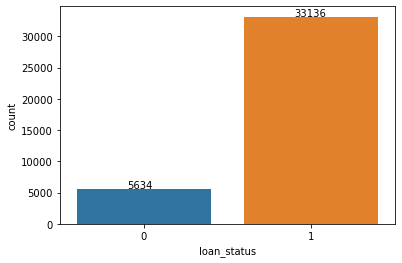

In [11]:
import seaborn as sns
print(data['loan_status'].value_counts(normalize=True))

ax = sns.countplot(x=data['loan_status'])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

This is a very imbalanced dataset, with 85% / 15% ratio.


Feature selection passes through a rather manual approach related to which features we shall exclude from the very beginning because of a number of reasons:
- They diclose information from the future (e.g. number of paid rates) that we shall not have when needing to predict if the loan will be paid or not. (e.g. the very information of `issue_d` is disclosing the fact that the loan was actually opened. In our scenario we won't have this information because, according to our prediction, we will accept/reject a request BEFORE the loan is opened.
- They do not add information (maybe contain a single value)
- They are too complex to manage or will require extensive work for limited added value
- They do not have a context or are an id (`member_id`)

In [12]:
# find how many columns have
distinct_value_counts_col = data.nunique(dropna=True)
single_value_cols = data.columns[distinct_value_counts_col == 1].tolist()
# payment plan has 42534 'n' values and 1 'y' value. will handle it has a unique value column
single_value_cols

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [13]:
t = ['not_relevant', 'not_relevant', 'ok' , 'leaks_future', 'leaks_future', 'ok', 'ok', 'ok', 'redundant', 'redundant', 'ko',
     'ok','ok_cat','ok','ok','leaks_future','ok','ok','ok_cat','ko','ko','ok','ok','ok','not_relevant','ok','ok','ok','ok','ok','ok','ok',
     'leaks_future', 'leaks_future', 'leaks_future', 'leaks_future','leaks_future','leaks_future','leaks_future',
     'leaks_future','leaks_future','leaks_future','leaks_future', 'leaks_future', 
     'ok', 'ok', 'ok', 'ok','ok', 'ok','ok','ok']
dd['flag'] = t
dd['flag'] = np.where(dd['col'].isin(single_value_cols), 'single_value', dd['flag'])
selected_cols = dd[dd['flag'].str.startswith('ok')]['col'].tolist()

In [14]:
dataset = data[selected_cols]
dataset.shape

(38770, 20)

In [15]:
dataset['home_ownership'].value_counts()

RENT        18550
MORTGAGE    17127
OWN          2992
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Reduced dataset size from 52 cols to 20. Great!

# Handling nulls and feature engineering work
- String management
-------------
- train_test_split
    - Prepare Pipeline
    - Null strategy management
    - Manage categorical variables
- impute values on train set only.
- SMOTE on train set, so that the train set has a more balanced share of classes (paid / not paid loans) # https://datascience.stackexchange.com/questions/15630/train-test-split-after-performing-smote
- model.fit(X_train_SMOTED, y_train_SMOTED)
-------------
- Pipeline on test set
- model.predict(X_test, y_test)
-------------

### String management
Converting all strings variable containing numeric data to float values. This is a preliminary requirement to handle nulls. Most of the work is done by parsing stings and extracting digits with `str.extract(some_regex)`, managed in the `parse_df_strings` function withing the `helpers` module.

In [16]:
dataset = helpers.parse_df_strings(dataset)
dataset.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.0,36.0,10.65,162.87,10.0,RENT,24000.0,Verified,1,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0
1,2500.0,60.0,15.27,59.83,0.0,RENT,30000.0,Source Verified,0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0
2,2400.0,36.0,15.96,84.33,10.0,RENT,12252.0,Not Verified,1,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0
3,10000.0,36.0,13.49,339.31,10.0,RENT,49200.0,Source Verified,1,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0
4,5000.0,36.0,7.90,156.46,3.0,RENT,36000.0,Source Verified,1,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0


In [17]:
target = 'loan_status'
features = [i for i in dataset.columns if i != target]
X = dataset[features]
y = dataset[target]

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y):
    strat_train_set = dataset.reindex(train_idx) 
    strat_test_set = dataset.reindex(test_idx)

X_train_strat = strat_train_set[features]
y_train_strat = strat_train_set[target]
X_test_strat = strat_test_set[features]
y_test_strat = strat_test_set[target]

In [19]:
y_train_strat.value_counts(normalize=True)

1    0.854688
0    0.145312
Name: loan_status, dtype: float64

In [20]:
y_test_strat.value_counts(normalize=True)

1    0.854656
0    0.145344
Name: loan_status, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('y_train_composition:\n', y_train.value_counts(normalize=True))
print('y_test_composition:\n', y_test.value_counts(normalize=True))

y_train_composition:
 1    0.856171
0    0.143829
Name: loan_status, dtype: float64
y_test_composition:
 1    0.848723
0    0.151277
Name: loan_status, dtype: float64


### Null management strategy

In [22]:
dataset.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1036
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util              1311
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [23]:
dataset[['emp_length', 'revol_util', 'pub_rec_bankruptcies']].describe()

,emp_length,revol_util,pub_rec_bankruptcies
count,37734.000000,37459.000000,38073.000000
mean,4.944215,50.311270,0.043495
std,3.557761,27.432196,0.204615
min,0.000000,0.010000,0.000000
25%,2.000000,27.600000,0.000000
50%,4.000000,50.600000,0.000000
75%,9.000000,73.100000,0.000000
max,10.000000,99.900000,2.000000


<Figure size 720x360 with 0 Axes>

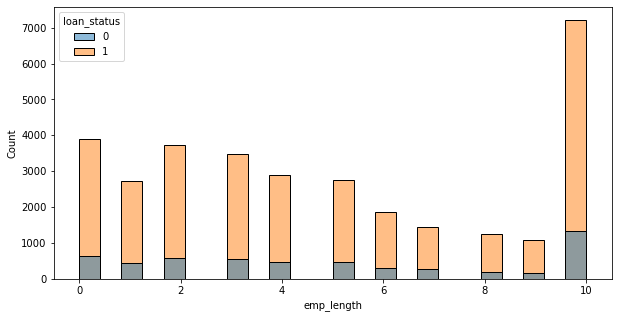

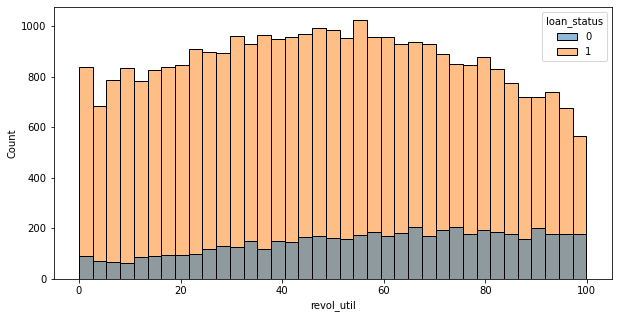

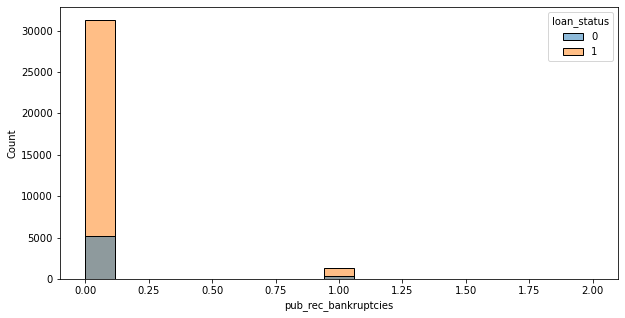

In [24]:
plt.figure(figsize=(10,5))
for col in ['emp_length', 'revol_util', 'pub_rec_bankruptcies']:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(dataset, x=col, hue='loan_status')

In [25]:
dataset.groupby('pub_rec_bankruptcies')['loan_status'].mean()

pub_rec_bankruptcies
0.0    0.858684
1.0    0.777035
2.0    0.600000
Name: loan_status, dtype: float64

Selected strategies:
- `pub_rec_bankruptcies` --> transform in a categorical variable that is 1/0 (basically `had_bankruptcies`)
- `emp_length` --> median due to skewed distribution.
- `revol_util` --> median / mean would be pretty similar given how well distributed the variable is.

### Pooling things together into a Pipeline
- create a `num_transformer` that will impute and scale data
- create a `cat_transformer` that will one-hot encode data
- put them into a `Pipeline` object

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
class AdjustThings(BaseEstimator, TransformerMixin):
    col_names = ['addr_state', 'home_ownership', 'pub_rec_bankruptcies']
    addr_idx, home_idx, bankrupt_idx = [
    dataset.columns.get_loc(c) for c in col_names] # get the column indices

    def __init__(self, pool_states=True): # no *args or **kargs
        self.pool_states = pool_states
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        X_final = X.copy()
        X_final['home_ownership'] = np.where(X_final['home_ownership'] == 'NONE', 'OTHER', X_final['home_ownership'])    
        X_final['went_bankrupt'] = np.where(X_final['pub_rec_bankruptcies'] >= 1, 1, 0)
        X_final = X_final.drop('pub_rec_bankruptcies', axis='columns')
        
        if self.pool_states:
            state_ranking = dataset['addr_state'].value_counts().cumsum()/ dataset.shape[0]
            states_to_pool = state_ranking.index[state_ranking >= 0.99]
            X_final['addr_state'] = np.where(X_final['addr_state'].isin(states_to_pool)
                                             , 'XX'
                                             , X_final['addr_state'])
            return X_final
        else:
            return X_final
        
attr_adder = AdjustThings(pool_states=False)

In [28]:
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
oh_encoder = OneHotEncoder(drop='if_binary') # if_binary will encode a single col in case it contains only 1/0 values
                                             # it is the case of 'went_bankrupt', coming out the attr_adder step

num_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', scaler)
])

cat_transformer = Pipeline(steps=[
    ('adjust', attr_adder), # custom transformer set up above
    ('onehot', oh_encoder)
])

# let's now define the exact columns that we want to pass through each step of the pipeline
num_cols = ['loan_amnt', 'term', 'int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths',
               'open_acc','pub_rec','revol_bal','revol_util','total_acc']
cat_cols = ['purpose',
            'home_ownership',
            # 'addr_state',
            'verification_status',
            'pub_rec_bankruptcies'
           ]

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_transformer, num_cols),
        ('categorical', cat_transformer, cat_cols),
    ]
    #,remainder = 'passthrough' # passthrough as a parameter can be used to avoid unexplicited cols to get dropped
)

train_prep = preprocessor.fit_transform(X_train_strat)#.toarray() #needed if output is a sparse matrix

In [29]:
def transform_into_dataframe(columntransformer, original_df, transformed_array):
    new_cat_cols = columntransformer.transformers_[1][1].named_steps['onehot'].get_feature_names_out().tolist()
    allcols = num_cols + new_cat_cols
    output = pd.DataFrame(data=transformed_array,
                          columns=allcols,
                          index=original_df.index) # VERY important to keep things aligned

    print('Output is the dataframe version of original_df:', (output.values == transformed_array).all())
    return output

train_prep_df = transform_into_dataframe(preprocessor, X_train_strat, train_prep)
train_prep_df

Output is the dataframe version of original_df: True


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,went_bankrupt_1
12750,-0.142470,-0.577152,0.884112,0.125016,-1.396753,-0.131555,0.761946,1.703737,1.048294,1.525527,-0.232809,0.954457,0.140190,0.433520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34007,-1.215146,-0.577152,-0.129138,-1.213784,-1.396753,-0.356635,0.740983,-0.296154,1.048294,-1.196454,-0.232809,-0.423722,0.177261,-0.526856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
26240,0.604330,-0.577152,-1.101858,0.783818,1.450792,0.044908,-1.454145,-0.296154,0.117571,0.618200,-0.232809,-0.370382,-1.316689,-0.003015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6147,-0.142470,-0.577152,1.170524,0.150105,-0.257735,-0.491683,1.458218,-0.296154,-0.813153,-0.289127,-0.232809,-0.432277,-0.556739,1.568510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6783,0.536439,1.732647,1.700116,0.039416,-0.827244,-0.386645,0.938635,-0.296154,-0.813153,-0.742791,-0.232809,1.265067,1.745351,-0.439550,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18762,0.163039,-0.577152,-0.329086,0.373791,-0.257735,-0.491683,1.533086,1.703737,-0.813153,0.845032,-0.232809,-0.212498,-0.267588,-0.701470,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34929,-0.414033,-0.577152,0.238334,-0.253914,-0.542490,-0.397869,0.514882,-0.296154,-0.813153,0.845032,-0.232809,-0.579656,-1.109093,1.219283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
20213,-0.821379,-0.577152,0.376136,-0.732767,-0.542490,-0.821800,-1.052853,-0.296154,1.979018,-0.289127,-0.232809,-0.623813,-0.849598,-1.138005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
35556,0.536439,-0.577152,0.154572,0.866199,0.027019,1.113888,0.517877,-0.296154,0.117571,0.391368,-0.232809,0.626613,0.677715,3.401956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


RECALL - true_positive_rate: 0.996 - not difficult given how many positives we have
PRECISION - 0.857 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.019 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.981 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


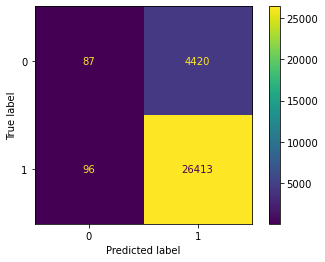

In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
lr = LogisticRegression(max_iter=500)
lr.fit(train_prep, y_train_strat)

def plot_confusion_matrix(fitted_est, X, y, threshold=None):
    if threshold is not None:
        positive_pred = fitted_est.predict_proba(X).T[1]
        y_pred = np.where(positive_pred > threshold, 1,0)
    else:
        y_pred = fitted_est.predict(X) # as using threshold = 0.5
#   handmade version
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    prec = round(tp / (tp+fp),3)
    recall = round(tp / (tp+fn),3)
    spec = round(tn / (fp+tn),3)
    fpr = round(1-spec,3)    
#    can be done also with built-in functions    
#    prec = precision_score(y, y_pred)
#    recall = recall_score(y, y_pred)
    
    print(f'RECALL - true_positive_rate: {recall} - not difficult given how many positives we have')
    print(f'PRECISION - {prec} - out of ALL the positives, how many do I get?')
    print('-'*70)
    print(f'SPECIFICITY - True_negative_rate: {spec} - How many negatives (non-paid loans) do I predict properly?')
    print(f'''FALSE POSITIVE RATE: {fpr} - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid''')
    ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=y_pred)

plot_confusion_matrix(lr, train_prep, y_train_strat)

In [31]:
# these scores are yield by statsmodels implementation as well
# import statsmodels.api as sm
# log_reg = sm.Logit(y_train_strat, train_prep_df).fit()
# log_reg.summary()
dict(zip(train_prep_df.columns, lr.coef_[0]))

{'loan_amnt': -0.07685778226747605,
 'term': -0.2587131150636049,
 'int_rate': -0.3857359331962731,
 'installment': 0.03945653558499426,
 'emp_length': -0.040302355337590516,
 'annual_inc': 0.4501028512609136,
 'dti': -0.024921691484560506,
 'delinq_2yrs': 0.005320776147098491,
 'inq_last_6mths': -0.14709622478138784,
 'open_acc': -0.026895270786193495,
 'pub_rec': -0.06822407761366754,
 'revol_bal': -0.05245241318252165,
 'revol_util': -0.13521612870916985,
 'total_acc': 0.014592112349397552,
 'purpose_car': 0.3466432856815385,
 'purpose_credit_card': 0.3880529599560158,
 'purpose_debt_consolidation': 0.1386552237325778,
 'purpose_educational': -0.3534750810566087,
 'purpose_home_improvement': 0.16839078641917887,
 'purpose_house': -0.0020114371574413595,
 'purpose_major_purchase': 0.27093597281651016,
 'purpose_medical': -0.15136133697634288,
 'purpose_moving': -0.17451547985595275,
 'purpose_other': -0.12085657184608659,
 'purpose_renewable_energy': -0.09343848207644272,
 'purpose_s

# Cross validate training

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [33]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_validate(lr, train_prep, y_train_strat, scoring=['roc_auc','precision', 'recall'], cv=skf, n_jobs=-1)
print('mean ROC-AUC:', scores['test_roc_auc'].mean())
scores

mean ROC-AUC: 0.7062841208688924


{'fit_time': array([1.27388287, 1.27028823, 1.05930281, 1.24454737, 1.09562469,
        1.10981941, 1.12005734, 1.01577163, 0.50782132, 0.52616596]),
 'score_time': array([0.01206803, 0.01812768, 0.01213336, 0.01714802, 0.01019025,
        0.00935078, 0.01007795, 0.01027894, 0.01021671, 0.01018095]),
 'test_roc_auc': array([0.71000359, 0.71868207, 0.71543768, 0.71782894, 0.71109258,
        0.6760809 , 0.69415806, 0.70342764, 0.70784861, 0.70828115]),
 'test_precision': array([0.85543338, 0.85603365, 0.85723556, 0.85718922, 0.85658663,
        0.85686465, 0.85700357, 0.85681818, 0.85598443, 0.85649351]),
 'test_recall': array([0.9977367 , 0.99811392, 0.99660505, 0.99622784, 0.99585062,
        0.99585062, 0.99509434, 0.99547341, 0.99547341, 0.99509619])}

Cross validation shows that along all the folds (within the training set, used as validation) we incur into a low ROC-AUC score, and super high recall. This is entirely due to class imbalance. Given our priority is to NOT FUND loans that will go bankrupt, we will try to MINIMIZE THE FALSE POSITIVES, or - which is equal -, maximize the TRUE NEGATIVES.

How? 
- We can be more rigid on the threshold we want to use to predict a positive classification (a paid loan). The standard value of `predict` uses a threshold of 0.5, which we can increase to, say, 0.8.
- Applying resampling strategies so that we can fit a model to a more robust scaler.

# HARSHER DECISION FUNCTION

In [34]:
print(lr.predict_proba(train_prep)[0:3])
positive_predictions = lr.predict_proba(train_prep).T[1]

[[0.33116884 0.66883116]
 [0.15020562 0.84979438]
 [0.08319897 0.91680103]]


RECALL - true_positive_rate: 0.438 - not difficult given how many positives we have
PRECISION - 0.939 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.834 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.166 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


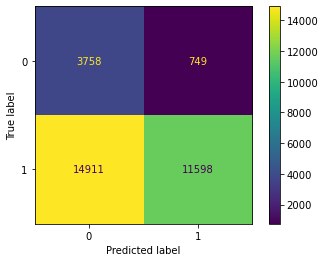

In [35]:
plot_confusion_matrix(lr, train_prep, y_train_strat, threshold=0.9)

This is an option, that allows us to get an improved score of specificity (so we are limiting the risk of losing money for loans that won't be paid), but at the same time we are missing out a huge opportunity, with a recall of 0.438. That is we will fund only 4 loans out of 10, and the remaining 6 would have been paid!

# RESAMPLING STRATEGY
We will be using SMOTE, even though it doesn't make sense if we are going to use categorical variables as well. Still it is an intaeresting example of how we can achieve different results by using the same model fitted with different data.

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipe

In [37]:
y_train_strat.value_counts()

1    26509
0     4507
Name: loan_status, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTENC # smote variant for categorical variables
# https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25

# get all the transformed category columns...
full_cat_cols = [i for i in train_prep_df.columns if i.startswith(tuple(cat_cols + ['went_bankrupt']))]
# ... and their indexes
cat_idxs =[train_prep_df.columns.get_loc(col) for col in full_cat_cols]

over = SMOTENC(categorical_features=cat_idxs, random_state=0, sampling_strategy=0.3)  # So that the minority sample is 30% of the majority sample - 26509 * 0.3
under = RandomUnderSampler(sampling_strategy=0.8) # 50% of the transformed minority sample (26509 * 0.3 / 0.8 )
steps = [('o', over)
        , ('u', under)
        ]
smotenc_pipe = ImbPipe(steps=steps)
X_trainres, y_trainres = smotenc_pipe.fit_resample(train_prep, y_train_strat)

In [39]:
smotenc_scores =  cross_validate(LogisticRegression(max_iter=500), X_trainres, y_trainres, scoring=['roc_auc','precision', 'recall'], cv=skf, n_jobs=-1)
print('mean ROC-AUC:', smotenc_scores['test_roc_auc'].mean())
smotenc_scores

mean ROC-AUC: 0.7717704787557239


{'fit_time': array([0.91182613, 0.88692045, 1.16898966, 1.12452674, 0.98512578,
        1.12913322, 0.9104166 , 1.12078023, 0.61537457, 0.62771344]),
 'score_time': array([0.01249528, 0.01096869, 0.01424384, 0.01122952, 0.01185083,
        0.01114917, 0.01821899, 0.00908232, 0.0091188 , 0.01214385]),
 'test_roc_auc': array([0.77118363, 0.7742346 , 0.77829493, 0.77364818, 0.76157195,
        0.76515825, 0.76002303, 0.78040191, 0.77812029, 0.77506802]),
 'test_precision': array([0.69886858, 0.6879668 , 0.69860627, 0.69853575, 0.68813559,
        0.69337979, 0.69466317, 0.7047619 , 0.69897084, 0.69809689]),
 'test_recall': array([0.80784708, 0.83400402, 0.80684105, 0.81589537, 0.81690141,
        0.80080483, 0.79879276, 0.81891348, 0.81991952, 0.81187123])}

RECALL - true_positive_rate: 0.816 - not difficult given how many positives we have
PRECISION - 0.698 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.559 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.441 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


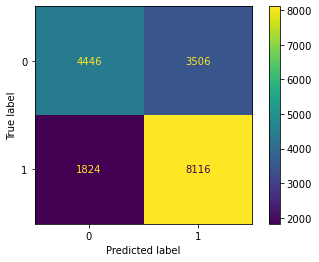

In [40]:
smotenc_lr = LogisticRegression(max_iter=500).fit(X_trainres, y_trainres)
plot_confusion_matrix(smotenc_lr, X_trainres, y_trainres)

RECALL - true_positive_rate: 0.659 - not difficult given how many positives we have
PRECISION - 0.75 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.726 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.274 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


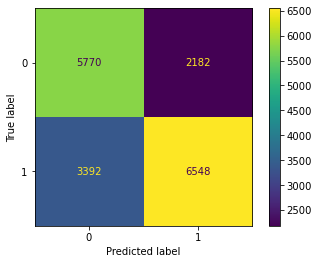

In [41]:
plot_confusion_matrix(smotenc_lr, X_trainres, y_trainres, threshold=0.6)

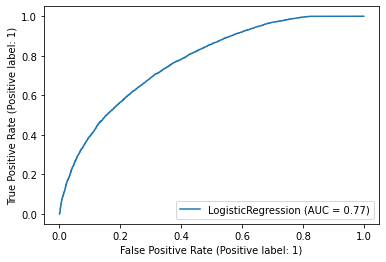

In [44]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, roc_auc_score, RocCurveDisplay
RocCurveDisplay.from_estimator(smotenc_lr, X_trainres, y_trainres)

# Going into the TEST SET
We ill compare performances on the never seen data of the test set, by using the two LR fitted with high class imbalance (`standard_lr`) and smoted variant (`smotend_lr`).

In [45]:
standard_lr = LogisticRegression(max_iter=500).fit(train_prep, y_train_strat)

In [46]:
# first transform the test set so that it has the same shape and is processed as the training set
test_prep = preprocessor.transform(X_test_strat)
print(X_train_strat.shape, '-->', train_prep.shape, '\n', X_test_strat.shape, '-->', test_prep.shape)

(31016, 19) --> (31016, 36) 
 (7754, 19) --> (7754, 36)


# we could have done all this also with a full pipeline!
clf = Pipeline(
     steps=[("preprocessor", preprocessor)
            , ("classifier", LogisticRegression(class_weight='balanced',
                                                max_iter=500))]
)
clf.fit(X_train_strat, y_train_strat)
clf.score(X_test_strat, y_test_strat)

#(clf.predict(X_test_strat) == lr.predict(test_prep)).all()

RECALL - true_positive_rate: 0.997 - not difficult given how many positives we have
PRECISION - 0.857 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.023 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.977 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


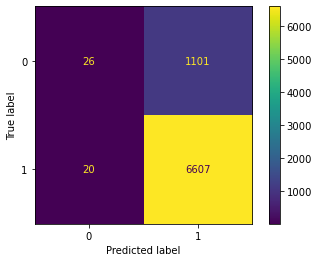

In [47]:
plot_confusion_matrix(standard_lr,
                      test_prep,
                      y_test_strat)

RECALL - true_positive_rate: 0.034 - not difficult given how many positives we have
PRECISION - 0.983 - out of ALL the positives, how many do I get?
----------------------------------------------------------------------
SPECIFICITY - True_negative_rate: 0.996 - How many negatives (non-paid loans) do I predict properly?
FALSE POSITIVE RATE: 0.004 - How many negatives am I predicting as positives?
    Loans that my model is telling me to fund but will not be repaid


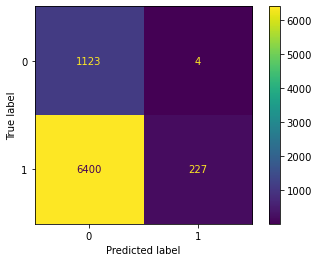

In [50]:
plot_confusion_matrix(smotenc_lr,
                      test_prep,
                      y_test_strat,
                     threshold = 0.9)